# **Entrega Final - Introducción al aprendizaje automático**

# **Grupo 5**
Integrantes

*  Caceres Ludmila      ludmilajazmin762@gmail.com
*  Montti Florencia     fmontti@estudiantes.unsam.edu.ar
*  Gorkin Mateo         mateogorkin03@gmail.com



# **Dataset: Arroz (Cammeo y Osmancik)**

**Acerca del** [Dataset](https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik) :

Este Dataset fue elaborado por la  Universidad de Selçuk, en Turquía, con el objetivo de desarrollar un sistema de visión computarizado para distinguir entre dos especies patentadas de arroz.  Las especies  utilizadas  son Osmancik, cuyo cultivo abarca gran superficie de plantación en Turquía desde 1997, y la especie Cammeo, la cual comenzó a cultivarse en el país a partir de 2014.

Para elaborar este conjunto de datos, se tomaron un total de 3810 imágenes de granos de arroz para las dos especies, se procesaron utilizando técnicas de procesamiento de imagenes y se hicieron inferencias de características. Posteriormente, se obtuvieron 7 características morfológicas para cada grano de arroz.


**Descripción del Dataset**

*   Este conjunto de datos contiene 3.810 filas y 8 columnas.
*   Las columnas  'Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent', contienen datos numéricos continuos.
*   La columna ‘Class’ contiene datos categóricos nominales, ya que indica la especie por  grano de arroz.
*   Durante la exploración, no se encontraron valores  faltantes en los datos.
* El  conjunto de datos elegido  presenta un ligero desequilibrio (43% de los datos corresponden a la especie Cammeo y 57% Osmancik)

**Objetivo**

Planteamos un *Problema de Clasificación Binaria.*

Target = "Class"

Este trabajo tiene como objetivo desarrollar un modelo de clasificación que prediga con precisión las especies de arroz Cammeo y Osmancik a partir de sus características morfológicas. Ademas, queremos un modelo que sea eficiente pero entendible, es decir, no complejo en extremo, analizando si todos los atributos son relevantes al momento de clasificar.

**Métricas de Evaluación**

Esperamos evaluar la eficiencia del modelo, utilizando las siguientes métricas de clasificación:

*   Matriz de confusión: si bien no es una métrica, será útil para ver errores específicos de cada clase.

* Accuracy : para medir la exactitud del modelo al momento de clasificar en ambas clases.

* AUC-ROC : Para observar el desempeño del modelo desde una perspectiva general.

**Modelos de clasificación:**

Modelo de referencia : modelo que representa nuestro punto de partida, su rol es proporcionarnos una base simple, es decir, un desempeño a superar por modelos más elaborados.

Modelo 1 : Iniciar la construcción de la clasificación de las muestras con un modelo que contenga todos los atributos.

Modelo con regularización : su objetivo es proporcionarnos la importancia de los atributos, permitiendonos seleccionar atributos que sean relevantes para clasificar y reducir la complejidad innecesaria en el modelo.

Modelos Finales : Modelo de regresión logistica con los atributos seleccionados y Random Forest con los mismos atributos




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

data, meta = arff.loadarff('/content/drive/MyDrive/Rice_Cammeo_Osmancik.arff')
df_arroz = pd.DataFrame(data)
df_arroz['Class'] = df_arroz['Class'].str.decode('utf-8')
df_arroz['Class'] = df_arroz['Class'].map({'Cammeo': 0, 'Osmancik': 1})

In [3]:
df_arroz_cp = df_arroz.copy() #copia para realizar graficos antes de eliminar valores atipicos

#Preprocesamiento

* Eliminación de valores atípicos: Observamos en boxplots realizados entre las variables y la variable target, que existen valores atípicos, por lo que decidimos eliminarlos para que nuestro modelo funcione con mayor precisión. Ademas, al realizar gráficos de pares entre todas nuestras variables, observamos que no existen dos atributos que puedan separar por completo una clase de la otra, existe ruido y parte de los valores atípicos, en menor medida, forman parte de este ruido.

* Escalado de los datos : Para realizar un modelo de regresión logística con el objetivo de clasificar, fue necesario escalar los datos para evitar que dominen los atributos cuyo rango era más amplio.

* Por último, la variable 'Class' fue transformada a númerica, para poder trabajar con ella. Se asigno el valor 0 a la clase 'Cammeo' y el valor 1 a la clase'Osmancik'.

<ipython-input-4-9c0c13268947>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Area', data=df_arroz_cp, palette= colores)


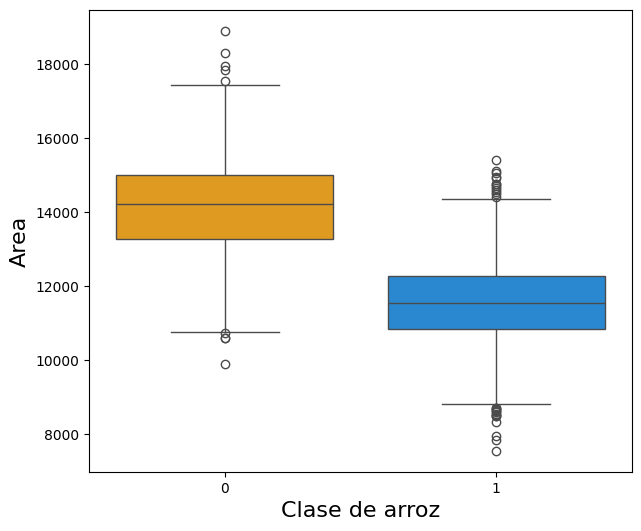

In [4]:
# Boxplot, para observar la presencia de valores atipicos.

colores = {'0':'#FFA302', '1':'#0E8BED'}
plt.figure(figsize=(7, 6))
sns.boxplot(x='Class', y='Area', data=df_arroz_cp, palette= colores)
plt.xlabel('Clase de arroz',fontsize=16)
plt.ylabel('Area',fontsize=16)
plt.show()

In [3]:
# Eliminacion de valores atipicos

continuous_vars = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length','Eccentricity', 'Convex_Area', 'Extent']
# Filtrar filas sin valores atípicos
for var in continuous_vars:
    Q1 = df_arroz[var].quantile(0.25)
    Q3 = df_arroz[var].quantile(0.75)
    IQR = Q3 - Q1
    df_arroz = df_arroz[(df_arroz[var] >= Q1 - 1.5 * IQR) & (df_arroz[var] <= Q3 + 1.5 * IQR)] # Eliminar filas con valores fuera del rango

print(df_arroz.shape) #

(3724, 8)


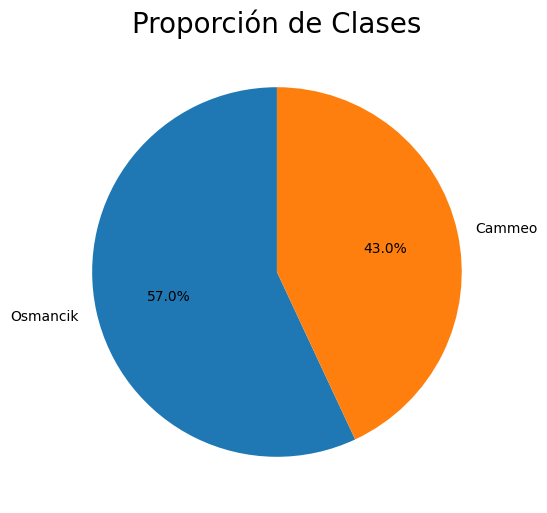

In [5]:
# Grafico circular, proporcion de clases luego de eliminar valores atipicos.

df_arroz['Class'] = df_arroz['Class'].map({0:'Cammeo', 1:'Osmancik'})

proporciones = df_arroz['Class'].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%',startangle=90) #inicia en el angulo 90 y formatea los porcentajes con decimal
plt.title('Proporción de Clases', fontsize=20)
plt.show()

In [7]:
# Volvemos a transformar la variable class a binaria 0/1
df_arroz['Class'] = df_arroz['Class'].map({'Cammeo': 0, 'Osmancik': 1})

# 📍 **Modelo de Referencia**

Para realizar un modelo de referencia, decidimos realizar un modelo de un solo atributo utilizando Regresión Logistica. El atributo seleccionado es "Area", porque es el atributo cuya correlación con la variable target es alta, con un valor de:

 Class vs Area = -0.75. Es una correlación muy alta, que podria sugerir que cierta influencia  predictora.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Divido los datos en conjuntos de entrenamiento y prueba
X = df_arroz[['Area']]
y = df_arroz['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

benchmark = Pipeline([
    ('scaler', StandardScaler()),
    ('modelo', LogisticRegression())])

benchmark.fit(X_train, y_train)

y_pred = benchmark.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo de referencia en Test:", round(accuracy, 2))
print("Coeficientes del modelo:")
print(benchmark['modelo'].coef_)

# Validacion cruzada en el 100% de los datos

scores = cross_val_score(benchmark, X, y, cv=5, scoring='accuracy')
print("Exactitud del modelo de referencia , Validacion cruzada 100%: ", round(scores.mean(), 4), "+/-", round(scores.std(), 4))

# Validacion cruzada en el 80% de los datos
scores_80 = cross_val_score(benchmark, X_train, y_train, cv=5, scoring='accuracy')
print("Exactitud del modelo de referencia, Validacion cruzada 80%: ", round(scores_80.mean(), 4), "+/-", round(scores_80.std(), 4))

Exactitud del modelo de referencia en Test: 0.88
Coeficientes del modelo:
[[-3.27752311]]
Exactitud del modelo de referencia , Validacion cruzada 100%:  0.8786 +/- 0.0352
Exactitud del modelo de referencia, Validacion cruzada 80%:  0.8788 +/- 0.0116


**Desempeño del modelo de referencia:**

Durante la evaluación usando validación cruzada en el 100% de los datos, se obtuvo un Accuracy de : **0.88**  y desviación estándar de +/- 0.03,  lo cual indica que es un bueno modelo de referencia y hay poca variabilidad entre los desempeños de cada fold, pero que podria mejorar.

Cuando realizamos una partición de los datos y evaluamos el modelo utilizando, tanto en Test como en Validación cruzada en el 80% de los datos se obtuvo un accuracy de: **0.88** y SD: 0.01 , indicando que en esta primera parte no tenemos sobreajuste .

Si observamos los coeficientes, cuyo valor es : -3.3, entendemos que es un valor considerado alto , que sugiere cierta influencia del atributo al momento de predecir las clases.

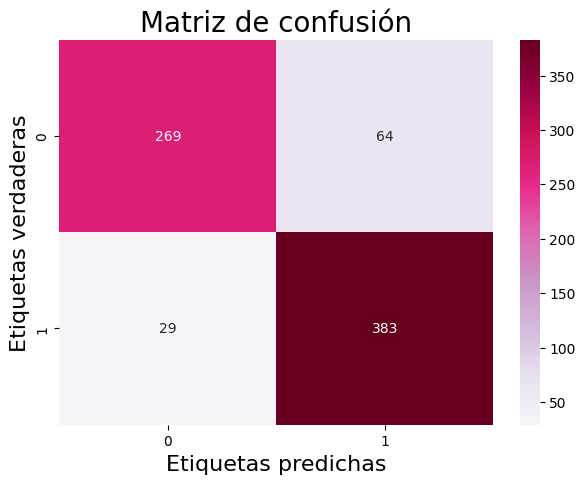

In [12]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.dpi'] = 100
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='PuRd')
ax.set_xlabel('Etiquetas predichas',fontsize=16)
ax.set_ylabel('Etiquetas verdaderas',fontsize=16)
ax.set_title('Matriz de confusión', fontsize=20)
plt.show()

**Matrix de confusión - Modelo de referencia**

De las 745 instancias utilizadas para evaluar el modelo en test, observamos que solo 93 fueron mal clasificadas, mayormente se generaron falsos positivos ( clase 0/Cammeo clasificada como Clase 1/Osmancik).

# 📈 Modelo 1 - Regresión Logistica

Comenzamos a construir nuestro modeo utilizando todos los atributos para predecir las muestras de arroz.
El modelo se evaluó  utilizando validación cruzada, donde se obtuvo una exactitud de 0.93 y SD: ± 0.02.

Durante la evaluación en test se obtuvo una exactitud del 0.94 en test y en validación cruzada con el 80% de los datos de 0.92 con SD: ± 0.0022 , lo cual indica que este primer modelo clasifica eficientemente las muestras, no sobreajusta y generaliza correctamente frente a datos nuevos.

In [8]:
X = df_arroz.drop('Class', axis=1)
y = df_arroz['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_modelo_1 = Pipeline([('scaler', StandardScaler()),
    ('modelo_1', LogisticRegression())])

pipeline_modelo_1.fit(X_train, y_train)

y_pred_test_m1 = pipeline_modelo_1.predict(X_test)
accuracy_test_m1 = accuracy_score(y_test, y_pred_test_m1)

print("Exactitud en Test: ", round(accuracy_test_m1,4))


Exactitud en Test:  0.9356


In [9]:
# Validacion cruzada 100% de los datos

scores = cross_val_score(pipeline_modelo_1, X, y, cv=5, scoring='accuracy')
print("Exactitud en Validación cruzada 100% : ", round(scores.mean(),4),"±", round(scores.std(),4))

#Validacion cruzada 80% de los datos

scores_80 = cross_val_score(pipeline_modelo_1, X_train, y_train, cv=5, scoring='accuracy')
print("Exactitud en Validación cruzada 80% : ", round(scores_80.mean(),4),"±", round(scores_80.std(),4))


Exactitud en Validación cruzada 100% :  0.9264 ± 0.0184
Exactitud en Validación cruzada 80% :  0.9241 ± 0.0022


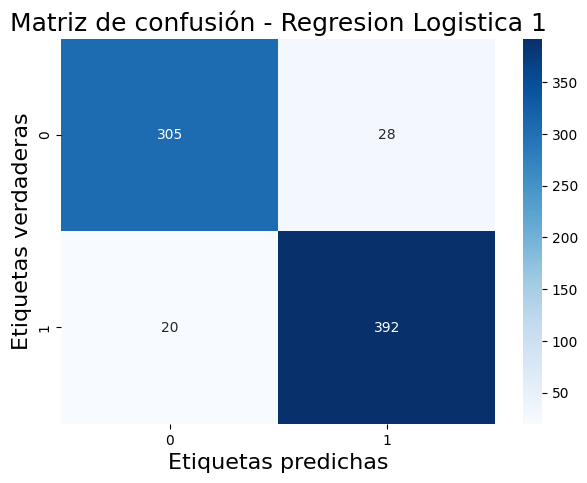

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test_m1)
plt.figure(figsize=(7, 5))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Etiquetas predichas',fontsize=16)
ax.set_ylabel('Etiquetas verdaderas',fontsize=16)
ax.set_title('Matriz de confusión - Regresión Logistica 1', fontsize=18)
plt.show()

**Análisis**


Sin embargo, si tenemos en cuenta el modelo de referencia con solo un atributo, donde se obtuvo una exactitud del 88% y este nuevo atributo del 93%, nos planteamos si todas las variables son escenciales al momento de predecir.


# **⚙️ Regularización**

Utilizamos Lasso / L1 como regularizador en un modelo con todos los atributos, para intentar seleccionar atributos con mayor importancia, usando GridSearchCV para encontrar el mejor valor de regularización acorde a un buen desempeño del modelo.


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

pipeline_l1 = Pipeline([('scaler', StandardScaler()), ('modelo2', LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter = 1000))])

# 11 valores de parámetro C
param_grid = {'modelo2__C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline_l1, param_grid, cv=kf, scoring='accuracy')

grid_search.fit(X, y)

mejor_C   = grid_search.best_params_['modelo2__C']

print("Mejor valor de C: ", mejor_C)

Mejor valor de C:  10.0


**Análisis de regularización**:

Teniendo en cuenta que C es el hiperparametro que controla la regularización en regresión logistica, donde a valores más pequeños se penaliza más el modelo. En nuestro caso, el mejor desempeño del modelo se obtuvo con un valor C=10 , que se considera una penalización/regularización baja entre nuestro rango de 11 valores desde `0,00001` a `100.000`.


Una vez obtenido este valor C, se realizó un modelo de regresión logistica con regularización l1, C=10, y se evaluó su desempeño utilizando validación cruzada en el 100% de los datos , posteriormente se evaluó en un conjunto de test y train.
Además, se observaron los coeficientes que nos ayudaron seleccionar variables




In [11]:
# Realizamos un Modelo con este valor de hiperparametro

pipeline_l1 = Pipeline([('scaler', StandardScaler()),
    ('modelo2', LogisticRegression(penalty = 'l1', C = 10 , solver = 'liblinear'))])


In [12]:
#Validacion cruzada en el 100% del test
scores = cross_val_score(pipeline_l1, X, y, cv=5, scoring='accuracy')
print("Exactitud en Validación cruzada: ", round(scores.mean(),4),"±", round(scores.std(),4))

#Validacion cruzada 80% de los datos

scores_80 = cross_val_score(pipeline_l1, X_train, y_train, cv=5, scoring='accuracy')
print("Exactitud en Validación cruzada 80% : ", round(scores_80.mean(),4),"±", round(scores_80.std(),4))


Exactitud en Validación cruzada:  0.9286 ± 0.0182
Exactitud en Validación cruzada 80% :  0.9272 ± 0.0071


In [13]:
# Utilizando train test split
pipeline_l1.fit(X_train, y_train)

y_pred_test = pipeline_l1.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud en Test: ", round(accuracy_test,4))

Exactitud en Test:  0.9369


In [18]:
nombre_columnas = X_train.columns
coeficientes =pipeline_l1['modelo2'].coef_[0]
df_coeficientes = pd.DataFrame({'Variable': nombre_columnas, 'Coeficiente': coeficientes})
print(df_coeficientes)

            Variable  Coeficiente
0               Area     9.414082
1          Perimeter     2.757302
2  Major_Axis_Length    -1.775459
3  Minor_Axis_Length    -0.529955
4       Eccentricity    -2.306596
5        Convex_Area   -13.334490
6             Extent     0.106489


  Con regularización c=10 se obtuvo una exactitud de la clasificación de las muestras de arroz de 0.93 con una desviación estándar entre folds muy pequeña de ± 0.02  utilizando validación cruzada.

Durante la evaluación en test y train, se obtuvo una exactitud de 0.93 en validación cruzada sobre el 80% de los datos con SD +- 0.0071 .Al momento de clasificar nuevas muestras de arroz en test, se obtuvo una exactitud de 0.94.

El eje central de la regularización, era seleccionar aquellos atributos que no obtuvieran coeficientes igual a 0 y realizar modelos con estos.
Como el modelo no fue demasiado penalizado , ningun coeficiente fue llevado completamente a 0.
Sin embargo se obtuvo que los atributos Extent y Minor_Axis_Length obtuvieron valores muy pequeños,en comparacion con los demás coeficientes, esto nos dice que no son realmente relevante para la clasificación.

Por lo tanto, proseguimos a realizar nuestros modelos finales sin penalizar, utilizando solamente los 5 atributos restantes.


# ↪️ **Modelo 2 - Regresión Logistica**

Definimos un modelo de regresión logistica utilizando solamente 5 atributos y sin  regularización.


In [14]:
X = df_arroz[['Area', 'Perimeter', 'Major_Axis_Length', 'Eccentricity', 'Convex_Area']]
y = df_arroz['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_none = Pipeline([('scaler', StandardScaler()), ('modelo2', LogisticRegression(penalty = None))])

In [16]:
# Validación cruzada 100% Datos
scores = cross_val_score(pipeline_none, X, y, cv=5, scoring='accuracy')
print("Exactitud en Validación cruzada 100% ", round(scores.mean(),4),"±", round(scores.std(),4))

# Validación cruzada 80% Datos


scores_80 = cross_val_score(pipeline_none, X_train, y_train, cv=5, scoring='accuracy')
print("Exactitud en Validación cruzada 80% ", round(scores_80.mean(),4),"±", round(scores_80.std(),4))



Exactitud en Validación cruzada 100%  0.9275 ± 0.0186
Exactitud en Validación cruzada 80%  0.9282 ± 0.005


In [18]:
pipeline_none.fit(X_train, y_train)

y_pred_test_none = pipeline_none.predict(X_test)
accuracy_none = accuracy_score(y_test, y_pred_test_none)

print("Exactitud en Test: ", round(accuracy_none,4))


Exactitud en Test:  0.9342


In [9]:
nombre_columnas_none = ['Area', 'Perimeter', 'Major_Axis_Length', 'Eccentricity', 'Convex_Area']
coeficientes_none =pipeline_none['modelo2'].coef_[0]
df_coeficientes_none = pd.DataFrame({'Variable': nombre_columnas_none, 'Coeficiente': coeficientes_none})
print(df_coeficientes_none)

            Variable  Coeficiente
0               Area    10.420410
1          Perimeter     3.001022
2  Major_Axis_Length    -2.143545
3       Eccentricity    -1.837428
4        Convex_Area   -14.865640


**Desempeño y Análisis del Modelo 2**

Este modelo de solo 5 atributos obtuvo un desempeño muy optimista con una exactitud de 0.93 en validación cruzada y una desviación estandar de ± 0.02, lo cual nos indica que hay baja variabilidad del desempeño de los modelos en cada uno de los folds.

Durante su evaluación en test y train, tambien se obtuvo un excelente desempeño sin señales de sobreajuste, pues clasificó los datos en test con una exactitud del 93% y del 93% durante validación cruzada en el 80% de los datos con SD +- 0.005.

En cuanto a sus coeficientes, notamos que el algoritmo considero más importante para separar entre clases los atributos Area y Convex_Area, y en menor medida al atributo Eccentricity.

**Matriz de Confusión**:

El desempeño se refleja claramente en la matriz de confusión, pues observamos que solamente fueron mal clasificados 47 muestras de arroz de un total de 745.

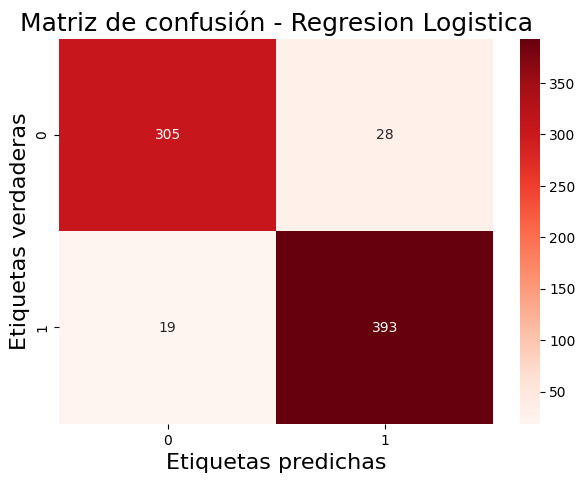

In [23]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(7, 5))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Reds')
ax.set_xlabel('Etiquetas predichas',fontsize=16)
ax.set_ylabel('Etiquetas verdaderas',fontsize=16)
ax.set_title('Matriz de confusión - Regresion Logistica', fontsize=18)
plt.show()

**Análisis de Curva ROC y Area bajo la curva**

El valor obtenido en el cálculo del area bajo la curva en el modelo usando regresión logistica es de 0.98.
Sabemos que mientras más cercano al valor 1, el modelo predice las clases con mayor eficacia, disminuyendo el error de predicción. Por lo tanto, nuestro modelo es altamente efectivo cuando clasifica entre clases.

Text(0, 0.5, 'Tasa de Verdaderos Positivos (TPR)')

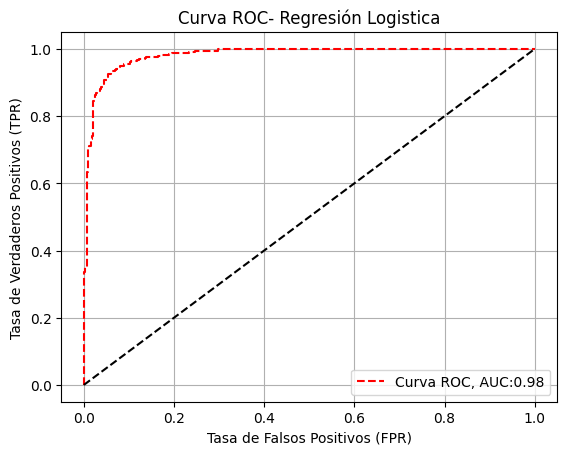

In [25]:
# Curva Roc + Area bajo la curva
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_probs = pipeline_none.predict_proba(X_test)[:, 1]
area_bc = roc_auc_score(y_test, y_probs)

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, ls = '--',color='red', label = 'Curva ROC, AUC:' + str(round(area_bc,2)))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.grid()  #muestra una grilla detras
plt.legend()
plt.title('Curva ROC- Regresión Logistica')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')

# 🌳 **Random Forest** 🌳

Decimos utilizar un modelo robusto como Random Forest, para comparar su desempeño con el modelo 2 de regresión logistica, utilizando los mismos 5 atributos.
Este modelo tiene hiperparametros optimizados, pues se conoce que tiene un desempeño óptimo cuando se realizan 100 arboles de decisión`(n_estimators=100)` y todos ellos tienen una profundidad máxima de 5 `(max_depth= 5)`.

In [21]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([('scaler', StandardScaler()),
    ('modelo3', RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=True, max_depth= 5))])

pipeline_rf.fit(X_train, y_train)

pred_rf_test = pipeline_rf.predict(X_test)

print(" RANDOM FOREST - Exactitud en test:   ", round(accuracy_score(y_test, pred_rf_test),4))

 RANDOM FOREST - Exactitud en train:    0.9342


In [22]:
# Validacion cruzada 100% :
scores = cross_val_score(pipeline_rf, X, y, cv=5, scoring='accuracy')
print("Exactitud en Validación cruzada 100%: ", round(scores.mean(),4),"±", round(scores.std(),4))

# Validacion cruzada 80%:
scores_80 = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Exactitud en Validación cruzada 80%: ", round(scores_80.mean(),4),"±", round(scores_80.std(),4))

Exactitud en Validación cruzada:  0.927 ± 0.0187
Exactitud en Validación cruzada:  0.9248 ± 0.002


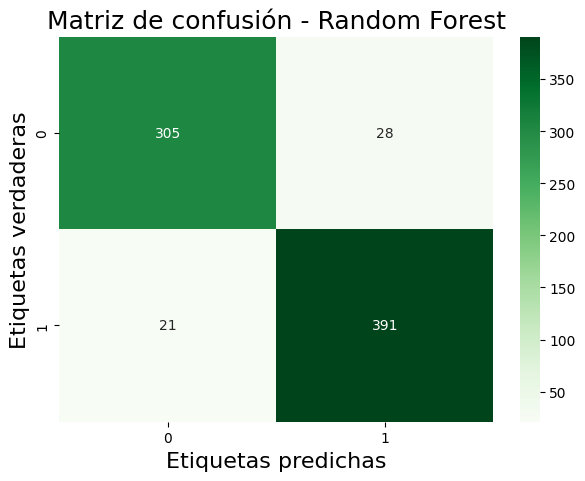

In [28]:
# Matriz de confusión - Random Forest

cm = confusion_matrix(y_test, pred_rf_test)
plt.figure(figsize=(7, 5))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Greens')
ax.set_xlabel('Etiquetas predichas',fontsize=16)
ax.set_ylabel('Etiquetas verdaderas',fontsize=16)
ax.set_title('Matriz de confusión - Random Forest', fontsize=18)
plt.show()

**Desempeño y Análisis de Random Forest**

Este modelo clasificó con exactitud el 93% de las muestras durante su evaluación en validación cruzada, con muy baja variablididad del desempeño y buena consitencia en los los resultados de cada fold, reflejados en una desviación estándar de ± 0.02.

Durante la evaluación es test, también se obtuvo un excelente rendimiento, clasificando con exactitud el 93,42% de las muestras.
Su evaluación en el conjunto de train del 80% utilizando validación cruzada fue del 93% con SD ± 0.002.

**Matriz de Confusión:**

En la matriz de confusión del modelo random forest observamos que solamente fueron mal clasificados 49 muestras de arroz de un total de 745.

**Importancia de los atributos**

En el análisis de la importancia de los atributos, notamos que el atributo Major_axis_length fue más influente en la reducción del indice Gini en promedio, seguido por Perimeter y Convex_Area.

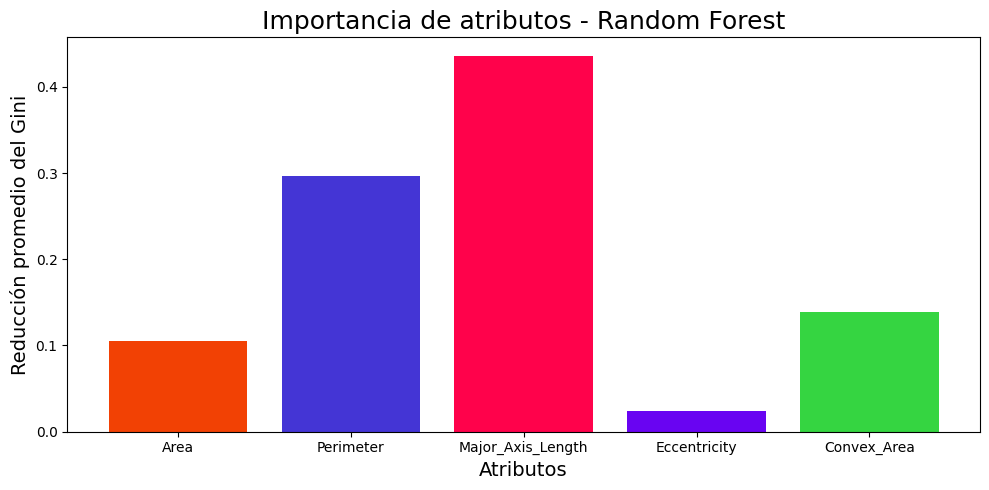

In [32]:
atributos_importancia = pipeline_rf['modelo3'].feature_importances_
feature_names = ['Area', 'Perimeter', 'Major_Axis_Length', 'Eccentricity', 'Convex_Area']
# Grafico de barras:
plt.figure(figsize=(10, 5))
colors = ['#F24104', '#4435D5', '#FF024B', '#6904F2', '#35D541']  # Lista de colores
plt.bar(feature_names, atributos_importancia, color=colors)
plt.xlabel("Atributos", fontsize = 14)
plt.ylabel("Reducción promedio del Gini", fontsize= 14)
plt.title("Importancia de atributos - Random Forest", fontsize = 18)
plt.tight_layout()
plt.show()

**Análisis de Curva ROC y Area bajo la curva**

Observando la curva roc, notamos que se inclina hacia la esquina superior izquierda del grafico, esto indica un excelente rendimiento del modelo , con una tasa alta de verdederos postivos y una baja tasa de falsos positivos en gran parte de los umbrales de clasificación.

En cuanto el area bajo la curva, obtuvimos un valor 0.97 , es decir, que nuestro modelo  Random Forest indica una alta capacidad para distinguir entre clases 'Cammeo' y 'Osmancik'.



Text(0, 0.5, 'Tasa de Verdaderos Positivos (TPR)')

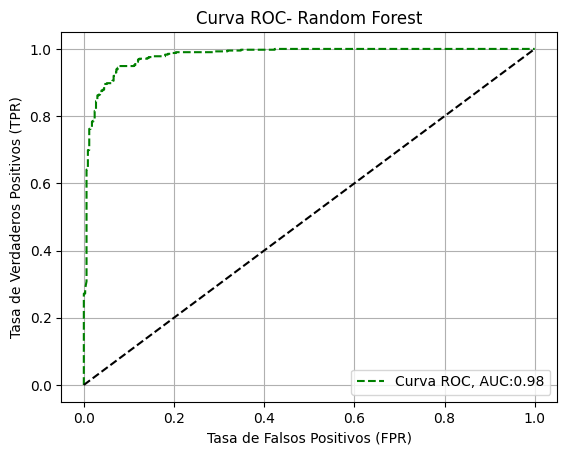

In [30]:
# AUC-ROC + Curva ROC en Random Forest
y_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]
area_bc_rf = roc_auc_score(y_test, y_prob_rf)
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, ls = '--',color='green', label = 'Curva ROC, AUC:' + str(round(area_bc_rf,2)))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.grid()
plt.legend()
plt.title('Curva ROC- Random Forest')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')

# **Conclusiones**

El modelo  Random Forest, Modelo 1 y Modelo 2 , superan a nuestro modelo de referencia con  diferencia. Recapitulando , de acuerdo a las evaluaciones utilizando validación cruzada:

* Exactitud Modelo de referencia = 88%
* Exactitud Modelo 1 Regresión Logistica = 93%
* Exactitud Modelo 2 Regresión Logistica = 93%
* Exactitud Modelo Random Forest = 93%

Por lo tanto, el modelo de referencia queda  descartado en la elección de modelo triunfante que llevara a cabo nuestra clasificación de arroz. También descartamos el modeo 1, ya que necesita de más atributos para obtener el mismo desempeño que el Modelo 2 y Random Forest.

# **Modelo Random Forest  - vs -  Modelo Regresión Logistica**

Debemos decidir cual de estos modelos ha triunfado, siendo superior al otro en cuanto a eficacia y precisión al momento de clasificar las clases de arroz.

Recapitulando, entendemos que no hay un modelo que triunfe sobre el otro por mucha diferencia, ya que:

* Exactitud Modelo 2 Regresión Logistica = 93%
* Exactitud Modelo Random Forest = 93%

Ambos tienen la misma exactitud, logrando clasificar el 93% de los datos en validacion cruzada .
En test, sucede lo mismo, ambos tienen un 93% de muestras clasificadas correctamente.

Asimismo,  el area bajo la curva de ambos es 0.98 , que sabemos que los convierte en dos  modelos excelentes que cumplen con su objetivo : clasificar la mayor cantidad de muestras de arroz correctamente.

Sin embargo, hay uno de ellos que cumple con nuestra idea principal : obtener un modelo clasificador eficaz y etendible, sin necesidad de agregar complejidades.

Nuestro modelo final es el modelo 2, que utiliza Regresión logistica para predecir utilizando los 5 atributos seleccionados, ya que realiza un solo modelo, en lugar de 100 ,  y logra el mismo desempeño que un modelo potente como lo es random forest.
Este modelo es mucho más fácil de comprender y transmitir, ademas de ser menos costoso computacionalmente.









In [33]:
print("Final del Trabajo")

Final del Trabajo
